# Task 4: Group Task

### Spain as country

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy as cp
import cartopy.crs as ccrs
from atlite.gis import ExclusionContainer
from atlite.gis import shape_availability
from rasterio.plot import show
from shapely.ops import unary_union
import rasterio
import atlite
from urllib.request import urlretrieve

/Users/hyoseungkim/anaconda3/envs/esm-2023/lib/python3.11/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/_m/3pl9zqz92r1cxw980866ny4c0000gn/T/ipykernel_9735/907559834.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shape

In [2]:
file = "https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2F&files=country_shapes.geojson"
shapes = gpd.read_file(file).set_index('name')

In [3]:
spain = shapes.query("index == 'ES'").to_crs(3035).geometry
spain.explore()

In [4]:
regions = "https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2Fgadm&files=gadm_410-levels-ADM_1-ESP.gpkg"
regions = gpd.read_file(regions)

In [5]:
regions

,GID_0,GID_1,COUNTRY,NAME_1,geometry
0,ESP,ESP.1_1,Spain,Andalucía,"MULTIPOLYGON (((-3.03125 35.94069, -3.03125 35..."
1,ESP,ESP.2_1,Spain,Aragón,"MULTIPOLYGON (((-0.81690 39.89858, -0.81272 39..."
2,ESP,ESP.3_1,Spain,Cantabria,"MULTIPOLYGON (((-3.93629 42.90813, -3.93672 42..."
3,ESP,ESP.4_1,Spain,Castilla-La Mancha,"MULTIPOLYGON (((-1.45231 38.58182, -1.46655 38..."
4,ESP,ESP.5_1,Spain,Castilla y León,"MULTIPOLYGON (((-5.62101 40.24145, -5.62189 40..."
5,ESP,ESP.6_1,Spain,Cataluña,"MULTIPOLYGON (((0.43801 40.54708, 0.43587 40.5..."
6,ESP,ESP.7_1,Spain,Ceuta y Melilla,"MULTIPOLYGON (((-2.44014 35.18292, -2.43958 35..."
7,ESP,ESP.8_1,Spain,Comunidad de Madrid,"MULTIPOLYGON (((-3.87292 39.90904, -3.87628 39..."
8,ESP,ESP.9_1,Spain,Comunidad Foral de Navarra,"MULTIPOLYGON (((-1.61091 41.94654, -1.61681 41..."
9,ESP,ESP.10_1,Spain,Comunidad Valenciana,"MULTIPOLYGON (((-0.75236 37.88653, -0.75236 37..."


### create 5 zones for the analysis:

In [6]:
# Andalucia
zone1 = regions.drop(range(1,17))
zone1 = unary_union(zone1.geometry)

#comunidad valencia, castilla la mancha, extremadura, madrid
zone2 = regions.drop([0,1,2,4,5,6,8,11,12,13,14,15,16,17])
zone2 = unary_union(zone2.geometry)

#cataluna und aragon
zone3 = regions.drop([0,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17])
zone3 = unary_union(zone3.geometry)

#8,14,15,4,16,2
zone4 = regions.drop([0,1,3,5,6,7,9,10,11,12,13,17])
zone4 = unary_union(zone4.geometry)

#11 Galicia
zone5 = regions.drop([0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17])
zone5 = unary_union(zone5.geometry)

geometries = [zone1,zone2,zone3,zone4,zone5]
names = ['zone_1','zone_2','zone_3','zone_4','zone_5',]


In [7]:
zones = gpd.GeoDataFrame(names, geometry = geometries)
zones['center'] = zones.geometry.centroid

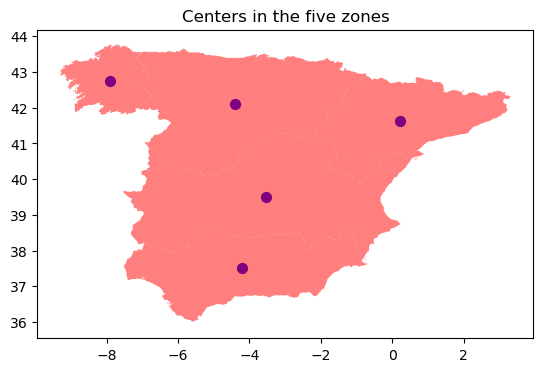

In [8]:
fig, ax = plt.subplots()

# Plot the points
zones.center.plot(ax=ax, color='blue', markersize=50)
point_color = (1, 0, 0, 0.5)
zones.geometry.plot(ax=ax, color=point_color )
ax.set_title("Centers in the five zones")

# Display the plot
plt.show()

## First, perform a land eligibility analysis
### onshore wind:
- 10km distance to airports
- 300m distance to major roads
- no natural protection areas
- maximum elevation of 2000m
- 1000m distance to built up areas
- only on suitable land cover classes

In [9]:
# file_roads = 'https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2F&files=ne_10m_roads.gpkg'
# file_airport = 'https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2F&files=ne_10m_airports.gpkg'
# file_classes = 'https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2Fcopernicus-glc&files=PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326-ES.tif'
# file_elevation = 'https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2Fgebco&files=GEBCO_2014_2D-ES.nc'
# file_protected = 'https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2Fwdpa&files=WDPA_Oct2022_Public_shp-ESP.tif'
# area = spain

In [25]:
# downloading files in local filesystem
file_roads = "ne_10m_roads.gpkg"
url = f"https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2F&files={file_roads}"
urlretrieve(url,file_roads)

file_airport = "ne_10m_airports.gpkg"
url = f"https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2F&files={file_airport}"
urlretrieve(url,file_airport)

file_classes = "PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326-ES.tif"
url = f"https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2Fcopernicus-glc&files={file_classes}"
urlretrieve(url,file_classes)

file_elevation = "GEBCO_2014_2D-ES.nc"
url = f"https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2Fgebco&files={file_elevation}"
urlretrieve(url,file_elevation)

file_protected = "WDPA_Oct2022_Public_shp-ESP.tif"
url = f"https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2Fwdpa&files={file_protected}"
urlretrieve(url,file_protected)

# file_era5 = ""

('WDPA_Oct2022_Public_shp-ESP.tif', <http.client.HTTPMessage at 0x14ae2c950>)

In [26]:
airports = gpd.read_file(file_airport)
roads = gpd.read_file(file_roads)

In [ ]:
airport = airports.geometry
roads.query("continent == 'Europe'")   # with that you can reduce the data size maybe, just in case it's necessary!
road = roads.geometry

In [12]:
# function to plot the exclusions (from excercise: Preparation for Group Assignment)
def plot_area(masked, transform, shape):
    fig, ax = plt.subplots(figsize=(5,5))
    ax = show(masked, transform=transform, cmap='Greens', vmin=0, ax=ax)
    shape.plot(ax=ax, edgecolor='k', color='None', linewidth=1)

In [ ]:
# exclude road and airport
excluder = ExclusionContainer(crs=3035, res = 500)
excluder.add_geometry(road, buffer = 300)
excluder.add_geometry(airport, buffer = 10000)
# exclude natural protection area
excluder.add_raster(file_protected, crs=3035)
# exclude elevation higher than 2000m
excluder.add_raster(file_elevation, codes = lambda x: x>2000, crs = 4326, invert=True)
# ^ this line eliminate a lot of area, which doesnt make sense... 
# is most of the territory of spain higher than 200??


In [ ]:
masked, transform = shape_availability(area.to_crs(3035).geometry, excluder)

In [ ]:
plot_area(masked,transform, regions.to_crs(3035).geometry)

### Offshore Wind
- within EEZ
- up to water depth of 50m
- no natural protection areas
- 10km minimum distance to shore

### Solar (rooftop & utility)
- only on suitable land cover classes
- no natural protection areas

## Second, using atlite download historical weather data from the ERA5 dataset into an atlite. 
Cutout as shown in the lecture for a year of your choice and the geographical bounds of your selected country (add a buffer of 0.25 degrees).

<Axes: >

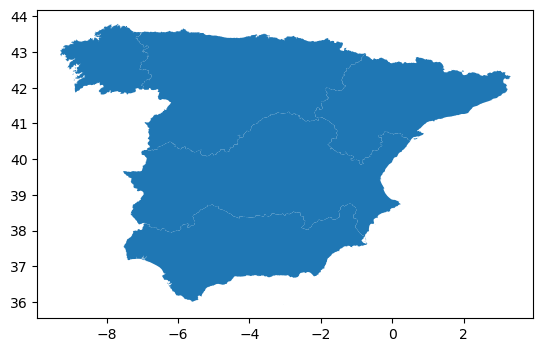

In [33]:
zones.plot()

- The following code is for creating dataset from ERA5, it doesnt have to be run anymore. 

In [ ]:
# minx, miny, maxx, maxy = zones.total_bounds
# buffer = 0.25

# cutout = atlite.Cutout(
#    path = 'era5-2020-ES.nc',
#    module = 'era5',
#    x = slice(minx - buffer, maxx + buffer),
#    y = slice(miny - buffer, maxy + buffer),
#    time = "2020",
# )

# cutout.prepare()

In [36]:
cutout = atlite.Cutout('era5-2020-ES.nc')

In [38]:
cutout

<Cutout "era5-2020-ES">
 x = -9.50 ⟷ 3.50, dx = 0.25
 y = 35.75 ⟷ 44.00, dy = 0.25
 time = 2020-01-01 ⟷ 2020-12-31, dt = H
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

In [39]:
cutout.data

<xarray.Dataset>
Dimensions:           (x: 53, y: 34, time: 8784)
Coordinates:
  * x                 (x) float64 -9.5 -9.25 -9.0 -8.75 ... 2.75 3.0 3.25 3.5
  * y                 (y) float64 35.75 36.0 36.25 36.5 ... 43.5 43.75 44.0
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-12-31T23:00:00
    lon               (x) float64 dask.array<chunksize=(53,), meta=np.ndarray>
    lat               (y) float64 dask.array<chunksize=(34,), meta=np.ndarray>
Data variables: (12/13)
    height            (y, x) float32 dask.array<chunksize=(34, 53), meta=np.ndarray>
    wnd100m           (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    wnd_azimuth       (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    roughness         (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    influx_toa        (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    influx_direct     (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    ...                ...
    albedo            (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    solar_altitude    (time, y, x) float64 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    solar_azimuth     (time, y, x) float64 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    temperature       (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    soil temperature  (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    runoff            (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
Attributes:
    module:             era5
    prepared_features:  ['height', 'influx', 'wind', 'runoff', 'temperature']
    chunksize_time:     100
    Conventions:        CF-1.6
    history:            2023-07-12 16:45:58 GMT by grib_to_netcdf-2.25.1: /op...